In [ ]:
# =====================================================
# EDA: Student Performance Dataset
# Name: Abdulaziz Aloufi
# Student ID: C00266252
# =====================================================

# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style for all plots
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [4]:
# --- 2. Load Dataset ---
# Read the student performance dataset from the data folder
# sep=";" is required because the CSV is semicolon-separated
df = pd.read_csv("../data/student-mat.csv", sep=";")

# Show the first few rows to get an initial look at the data
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
# --- 3. Basic Data Overview ---
# Display information about columns, data types and non null counts
df.info()

# Show basic descriptive statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# --- 4. Missing Values Analysis ---
# Count missing values per column
df.isnull().sum()

# Count total number of missing values in the entire dataset
df.isnull().sum().sum()

np.int64(0)

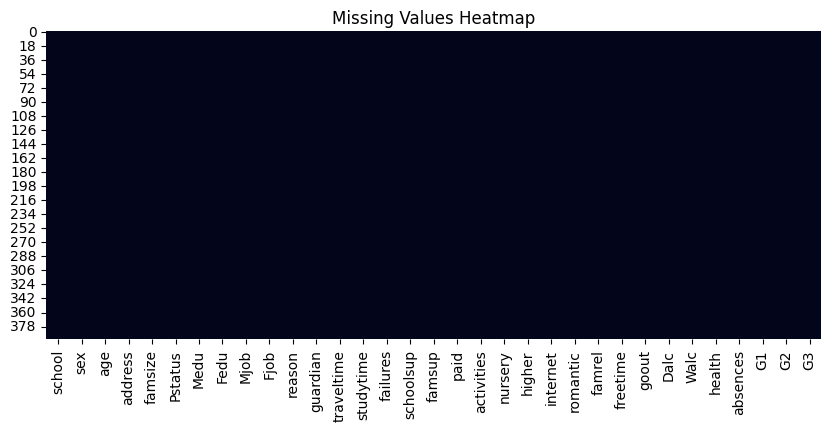

In [7]:
# Visualise where (if anywhere) missing values occur in the dataframe
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

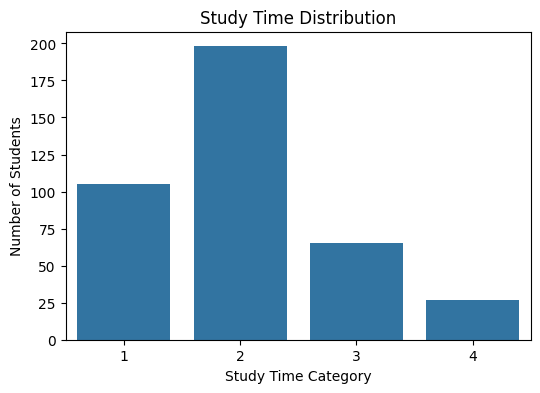

In [10]:
# --- 5. Univariate Distributions ---

# Study time distribution (categorical 1–4)
plt.figure(figsize=(6, 4))
sns.countplot(x="studytime", data=df)
plt.title("Study Time Distribution")
plt.xlabel("Study Time Category")
plt.ylabel("Number of Students")
plt.show()

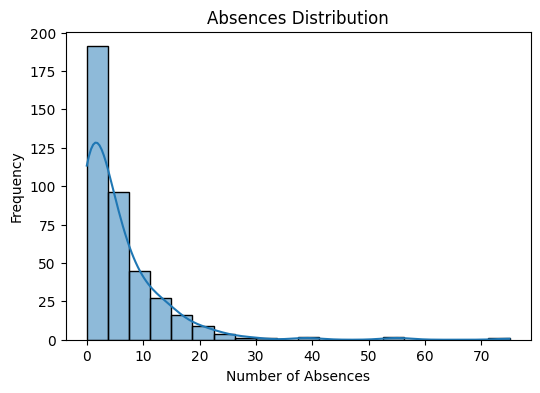

In [11]:
# Absences distribution (numeric, possibly skewed)
plt.figure(figsize=(6, 4))
sns.histplot(df["absences"], kde=True, bins=20)
plt.title("Absences Distribution")
plt.xlabel("Number of Absences")
plt.ylabel("Frequency")
plt.show()

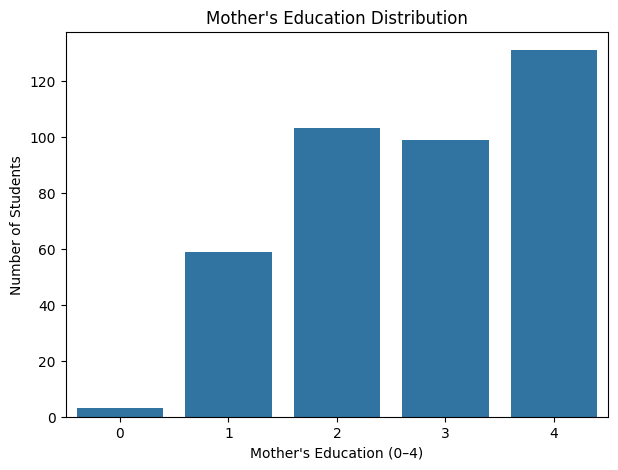

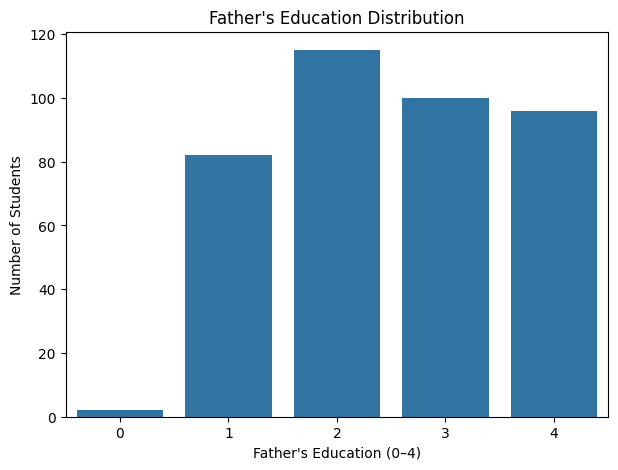

In [12]:
# Mother's education level distribution
plt.figure(figsize=(7, 5))
sns.countplot(x="Medu", data=df)
plt.title("Mother's Education Distribution")
plt.xlabel("Mother's Education (0–4)")
plt.ylabel("Number of Students")
plt.show()

# Father's education level distribution
plt.figure(figsize=(7, 5))
sns.countplot(x="Fedu", data=df)
plt.title("Father's Education Distribution")
plt.xlabel("Father's Education (0–4)")
plt.ylabel("Number of Students")
plt.show()

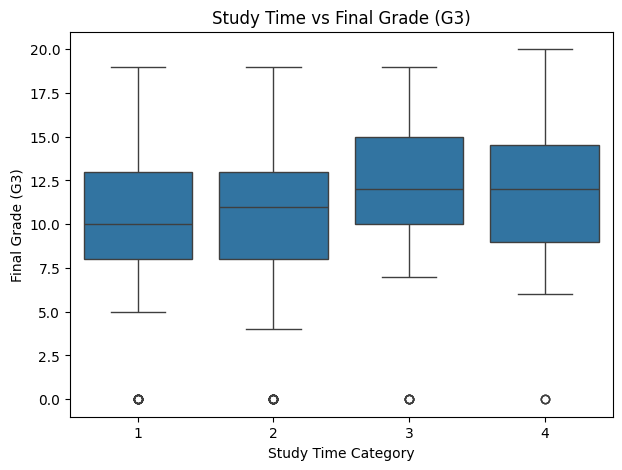

In [13]:
# --- 6. Relationship Between Study Time and Final Grade ---

# Boxplot of final grade G3 grouped by study time category
plt.figure(figsize=(7, 5))
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time Category")
plt.ylabel("Final Grade (G3)")
plt.show()

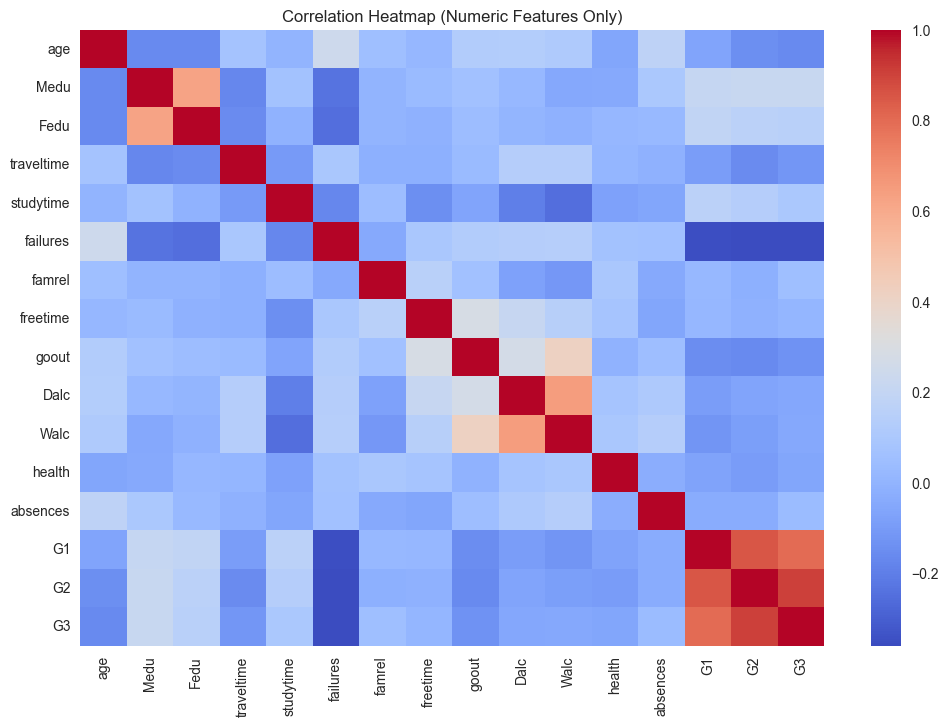

In [ ]:
# --- 7. Correlation Analysis (Numeric Features Only) ---

# Select only numeric columns (int/float) for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [12]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64